In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [24]:
X_train = X_train/255
X_test = X_test/255
from tensorflow.keras.utils import to_categorical
y_cat_train  = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)


In [7]:
model = keras.models.load_model('/content/gdrive/My Drive/Colab_Models/model_{}.h5')

In [18]:
model.evaluate(X_test, y_cat_test, verbose = 1)

313/313 [==============================] - 89s 281ms/step - loss: 0.7089 - accuracy: 0.8869


[0.7089347839355469, 0.886900007724762]

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 81s 258ms/step


In [21]:
print(classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1000
           1       0.95      0.95      0.95      1000
           2       0.89      0.79      0.84      1000
           3       0.78      0.78      0.78      1000
           4       0.85      0.91      0.88      1000
           5       0.85      0.82      0.83      1000
           6       0.85      0.95      0.90      1000
           7       0.95      0.90      0.92      1000
           8       0.95      0.92      0.94      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [22]:
confusion_matrix(y_test, classes_x)

array([[909,   7,  17,   7,  12,   4,  10,   3,  21,  10],
       [  5, 947,   1,   2,   1,   1,   4,   0,   7,  32],
       [ 42,   1, 789,  38,  39,  23,  55,  10,   2,   1],
       [  8,   3,  27, 784,  31,  77,  49,   9,   7,   5],
       [  2,   0,  11,  29, 914,   9,  24,  11,   0,   0],
       [  7,   1,  19,  93,  26, 816,  20,  17,   0,   1],
       [  3,   1,   6,  19,   8,   6, 953,   1,   1,   2],
       [  5,   0,  13,  17,  36,  23,   4, 899,   1,   2],
       [ 36,   7,   3,   5,   2,   2,   3,   1, 923,  18],
       [ 11,  30,   1,   5,   1,   3,   5,   0,   9, 935]])

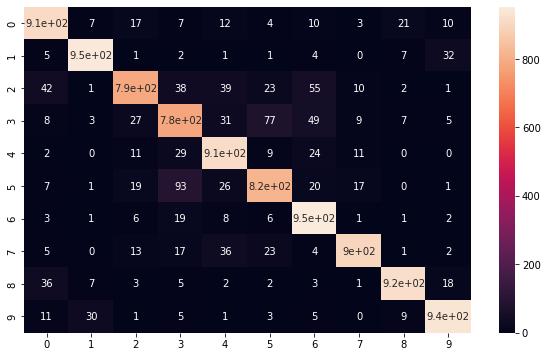

In [23]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.heatmap(confusion_matrix(y_test, classes_x), annot = True)